IDEAS:
-MAPA
-STREAMLIT
-README
-Prediccion de vuelos actuales

ANALIZAR DONE
LIMPIAMOS



## Import libraries and packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error

## Reading CSV  with pandas

In [2]:
scl_flt = pd.read_csv("dataset_SCL.csv")

C:\Users\sebas\AppData\Local\Temp\ipykernel_15576\2756499070.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  scl_flt = pd.read_csv("dataset_SCL.csv")


In [3]:
scl_flt.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


# Analysis of categorical variables

In [4]:
scl_flt[["Vlo-I","Vlo-O","Ori-I","Ori-O","Des-I","Des-O","SIGLAORI","SIGLADES","Emp-I","Emp-O","OPERA","TIPOVUELO","DIANOM"]].describe()

,Vlo-I,Vlo-O,Ori-I,Ori-O,Des-I,Des-O,SIGLAORI,SIGLADES,Emp-I,Emp-O,OPERA,TIPOVUELO,DIANOM
count,68206,68205,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206
unique,750,866,1,1,64,63,1,62,30,32,23,2,7
top,174,174,SCEL,SCEL,SCFA,SCFA,Santiago,Buenos Aires,LAN,LAN,Grupo LATAM,N,Viernes
freq,686,649,68206,68206,5787,5786,68206,6335,37611,20988,40892,36966,10292


In [5]:
print("FECHA-I")
print(scl_flt["Fecha-I"].max())
print(scl_flt["Fecha-I"].min())
print("FECHA-O")
print(scl_flt["Fecha-O"].max())
print(scl_flt["Fecha-O"].min())

FECHA-I
2017-12-31 23:55:00
2017-01-01 00:15:00
FECHA-O
2018-01-01 00:12:00
2017-01-01 00:04:00


As we can see, variables such as the number of flight ```Vlo-I``` ,```Vlo-O```, have different values in the description. The flight number has more unique values on the actual operated flights and the top value is the flight **174** on both variables.

Something similar is happening with the variables related with the destination ```Des-I``` ,```Des-O```, in which the number of unique values of the operated destination is less than the schedule values, in this case the most frequent destination is **SCFA** that correspond to the airport of Antofagasta in Chile (ICAO airport code), base on this we want to check the type of flight with the variable ```TIPOVUELO``` and we can check that the 54% of the flight are national flights.

Another interesting and disruptive thing that we can notice is that the variable ```SIGLADES``` that is the name of the city of destination does not correspond with the ICAO code airport of the variable ```Des-O``` or ```Des-I```, and as I said before the most common destination is Antofagasta, but in this case Buenos Aires in Argentina is the most frequent city of destination, so we need to check why this is happening with this variable.


With the code of the airline ```Emp-I``` ```Emp-O``` and the name ```OPERA``` we can notice that there are less names of airlines that codes, this because the airline can operate with different codes, and we can check in the next cells. Grupo LATAM with the callsign of LAN have the most frequent operation in SCEL.

Finally the data is composed for 68206 records. with dates from january of 2017 to december of 2017 and as is expected the column of the operated have the max data the first of January


## Cleaning and anlysis

### Flight Number

No hay NA, transformamos la vairable the Operados, luego la de inicial, se mira cuales son los remannte que permanecen desiguales

In [6]:
scl_flt.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [7]:
scl_flt[scl_flt.apply(lambda x: x['Vlo-I'] != x['Vlo-O'], axis = 1)][["Vlo-I","Vlo-O"]].value_counts().head(10)

Vlo-I  Vlo-O
170    170.0    43
168    168.0    43
164    164.0    42
162    162.0    41
150    150.0    40
174    174.0    37
156    156.0    36
172    172.0    32
166    166.0    32
231    231.0    31
dtype: int64

In [8]:
scl_flt["Vlo-Ope"]=scl_flt.apply(lambda x: str(x['Vlo-O']).replace(".0",""), axis = 1)

In [9]:
scl_flt[scl_flt.apply(lambda x: x['Vlo-I'] != x['Vlo-Ope'], axis = 1)][["Vlo-I","Vlo-Ope"]].describe()

,Vlo-I,Vlo-Ope
count,2789,2789
unique,237,240
top,281,281
freq,54,54


In [10]:
scl_flt["Vlo-Ini"]=scl_flt["Vlo-I"].astype(str)

In [11]:
scl_flt[scl_flt.apply(lambda x: x['Vlo-I'] != x['Vlo-Ini'], axis = 1)][["Vlo-I","Vlo-Ini"]].value_counts().head(5)

Vlo-I  Vlo-Ini
281    281        54
50     50         50
704    704        41
572    572        31
340    340        31
dtype: int64

In [12]:
scl_flt[["Vlo-I","Vlo-Ini","Vlo-O","Vlo-Ope"]].describe()

,Vlo-I,Vlo-Ini,Vlo-O,Vlo-Ope
count,68206,68206,68205,68206
unique,750,584,866,609
top,174,174,174,174
freq,686,686,649,686


In [13]:
scl_flt[scl_flt.apply(lambda x: x['Vlo-Ini'] != x['Vlo-Ope'], axis = 1)][["Des-I","Des-O","Vlo-Ini","Vlo-Ope"]].value_counts()

Des-I  Des-O  Vlo-Ini  Vlo-Ope
SAEZ   SAEZ   4501     1001       19
              4503     1003       11
                       1303        5
SPJC   SPJC   702      700         3
SAEZ   SAEZ   7811     1101        3
                                  ..
              7813     1071        1
KATL   KATL   146      9858        1
SCAT   SCAT   114      114R        1
SCDA   SCDA   110      33          1
SUMU   SUMU   989P     989         1
Length: 73, dtype: int64

### Destination

Los vuelos simplemente cambiaron de destino debido a alguna razon durante el vuelo, tiene sentido ya que puede ser el aeropuerto alterno y sha
2 casos no terminan en el mismo pais pero su aeropuerto alterno se encuentra en otro pais, ecuador, brasil 
2 dado el codigo ICAO no corresponden al mismo pais pero realmente si ya que estos paises tienen una composicion de codigo diferente a la de sur america Australia y estaods unidos

In [14]:
scl_flt[scl_flt.apply(lambda x: x['Des-I'] != x['Des-O'], axis = 1)][["Des-I","Des-O"]].value_counts()

Des-I  Des-O
SCTE   SCQP     5
SABE   SAEZ     4
SCBA   SCTE     4
SAEZ   SABE     3
KIAH   KIAD     1
KJFK   KMIA     1
SARI   SBFI     1
SBGR   SBGL     1
SCCI   SCTE     1
SCFA   SCCF     1
SCIE   SCQP     1
       SCTE     1
SCTE   SCCI     1
SEGU   SABE     1
SEQU   SEQM     1
YSSY   YMML     1
dtype: int64

In [15]:
diffDest = scl_flt[scl_flt.apply(lambda x: x['Des-I'] != x['Des-O'], axis = 1)][["Des-I","Des-O"]]

In [16]:
diffDest['Des-I']=diffDest['Des-I'].str.slice(0, 2)
diffDest['Des-O']=diffDest['Des-O'].str.slice(0, 2)

In [17]:
diffDest['Des-I']== diffDest['Des-O']

1397      True
7290      True
7520      True
8456      True
12787     True
12823     True
16169    False
16937    False
18293     True
20444     True
24569     True
25419     True
25422     True
25492     True
33166     True
37162     True
38094     True
38135     True
38136     True
39265     True
42112     True
55144     True
61463     True
62651    False
67599     True
67600     True
67601     True
67697    False
dtype: bool

El conteo por aeropuertos nos muestra que solo un aeropuerto atiende antofagasta mientras que a Buenos aires tiene ezeia y el aeroparque 
Al final la ciudad corresponde al aeropuerto actualemente operado, confirmando lo que antes se mostro

In [18]:
scl_flt[scl_flt["SIGLADES"]=="Buenos Aires"].pivot_table(values = "Fecha-I", index = ["Des-I","Des-O"], columns = "SIGLADES",  aggfunc = "count")

SIGLADES     Buenos Aires
Des-I Des-O              
SABE  SABE           3090
      SAEZ              4
SAEZ  SABE              3
      SAEZ           3237
SEGU  SABE              1

### Airline

In [19]:
scl_flt["Emp-I"].value_counts()

LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      358
DAL      358
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      216
BAW      205
QFU      195
JMR      100
LRC       92
AUT       74
PUE       49
LXP        9
LPE        4
DSM        2
LNE        1
Name: Emp-I, dtype: int64

In [20]:
scl_flt["Emp-O"].value_counts()

LAN    20988
LXP    14558
SKU    14298
TAM     3046
ARG     1946
CMP     1850
JMR     1647
LPE     1214
JAT     1095
AVA      885
GLO      806
AAL      757
ACA      565
DSM      493
LNE      374
IBE      362
AFR      358
DAL      358
LRC      357
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      219
BAW      205
QFA      195
AUT       77
PUE       49
56R       17
48O       10
TPU        2
Name: Emp-O, dtype: int64

In [21]:
scl_flt[scl_flt["OPERA"]=="Grupo LATAM"]["Emp-I"].value_counts().sum()

40892

In [22]:
scl_flt[scl_flt["OPERA"]=="Grupo LATAM"]["Emp-O"].value_counts().sum()

40892

In [23]:
scl_flt[scl_flt["OPERA"]=="Grupo LATAM"].pivot_table(index=["Emp-I","Emp-O"], columns ="OPERA", values = "Des-I", aggfunc = "count")

OPERA        Grupo LATAM
Emp-I Emp-O             
DSM   DSM              2
LAN   DSM            491
      LAN          20988
      LNE            373
      LPE           1210
      LXP          14549
LAP   LAP            216
LNE   LNE              1
LPE   LPE              4
LXP   LXP              9
TAM   LAP              3
      TAM           3046

In [24]:
scl_flt[scl_flt["OPERA"]=="Grupo LATAM"].pivot_table(index=["Emp-I","Emp-O"], columns ="OPERA", values = "Des-I", aggfunc = "count")

OPERA        Grupo LATAM
Emp-I Emp-O             
DSM   DSM              2
LAN   DSM            491
      LAN          20988
      LNE            373
      LPE           1210
      LXP          14549
LAP   LAP            216
LNE   LNE              1
LPE   LPE              4
LXP   LXP              9
TAM   LAP              3
      TAM           3046

In [25]:
scl_flt[scl_flt["OPERA"]!="Grupo LATAM"]["OPERA"].value_counts()

Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

The numeric values that we can see on the DataFrame are linked with the date, so basically does not provide to us more information about the things that we already have.

## New Variables

In [26]:
scl_flt["Date-I"] = pd.to_datetime(scl_flt["Fecha-I"])
scl_flt["Date-O"] = pd.to_datetime(scl_flt["Fecha-O"])

In [27]:
scl_flt["temporada_alta"]=(scl_flt["Date-I"]<="2017-03-03")+(scl_flt["Date-I"]>"2017-07-15") & (scl_flt["Date-I"]<"2017-07-31")+(scl_flt["Date-I"]>"2017-09-11") & (scl_flt["Date-I"]<"2017-09-30")+(scl_flt["Date-I"]>"2017-12-15")

In [28]:
scl_flt["temporada_alta"]= scl_flt["temporada_alta"]*1

In [29]:
scl_flt["dif_min"]=((scl_flt["Date-O"]-scl_flt["Date-I"])/pd.Timedelta(minutes=1)).astype(int)

In [30]:
scl_flt["atraso_15"]=(scl_flt["dif_min"]>15)*1

In [31]:
scl_flt["HOUR"]=scl_flt["Date-I"].apply(lambda x: x.hour)

In [32]:
scl_flt["periodo_dia"] = "noche"

In [33]:
scl_flt.loc[(scl_flt["HOUR"]>=5) & (scl_flt["HOUR"]<12),["periodo_dia"]] = "manana"

In [34]:
scl_flt.loc[(scl_flt["HOUR"]>=12) & (scl_flt["HOUR"]<19),["periodo_dia"]] = "tarde"

In [35]:
scl_flt[["temporada_alta","dif_min","atraso_15","periodo_dia"]].to_csv("synthetic_features.csv",index=False)

## Delayed flights rate

Empezamos por lo basico, descripcion de metricas estadisticas....
Debo evalaur por aerolinea, temporada, mes, tipo de vuelo 

In [36]:
scl_flt["dif_min"].describe()

count    68206.000000
mean         9.110855
std         19.313387
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: dif_min, dtype: float64

Hay bastantes outliers fuera de la distribucion del boxplot, sabemos que los bigotes hacen parte de los casos maximos, dependientes del ICR.

el ICR es 13 y el fin del bigote esta en 31

In [37]:
(13*1.5)+12

31.5

C:\Users\sebas\anaconda3\envs\LATAM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dif_min'>

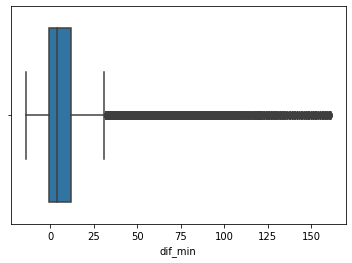

In [38]:
sns.boxplot(scl_flt["dif_min"])

C:\Users\sebas\anaconda3\envs\LATAM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dif_min'>

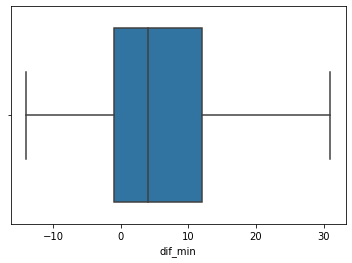

In [39]:
 sns.boxplot(scl_flt["dif_min"],showfliers = False)

El percentil 95 nos idica que el 95% de los vuelos estan con un retraso igual o debajo de 26 minutos

In [40]:
scl_flt["dif_min"].quantile(.90)

26.0

In [41]:
def highlight(val):
    if(val>=15):
        color = 'red'
    elif(val<10):
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color

In [42]:
scl_flt.pivot_table(values = "dif_min",columns="TIPOVUELO",aggfunc=(np.mean))

TIPOVUELO,I,N
dif_min,10.638892,7.81951


<AxesSubplot:xlabel='TIPOVUELO', ylabel='dif_min'>

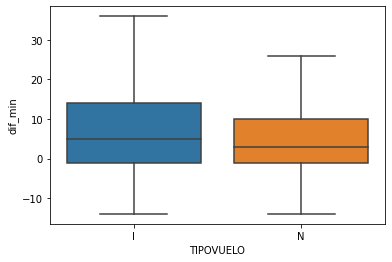

In [43]:
sns.boxplot(x="TIPOVUELO", y="dif_min", data=scl_flt, showfliers = False)

In [44]:
scl_flt.pivot_table(values = "dif_min",index="OPERA",columns="TIPOVUELO",aggfunc=(np.mean)).style.applymap(highlight)

TIPOVUELO,I,N
OPERA,,
Aerolineas Argentinas,10.004618,nan
Aeromexico,-2.495726,nan
Air Canada,22.909735,nan
Air France,1.399441,nan
Alitalia,5.293436,nan
American Airlines,0.277411,nan
Austral,6.608108,nan
Avianca,11.131944,nan
British Airways,7.560976,nan


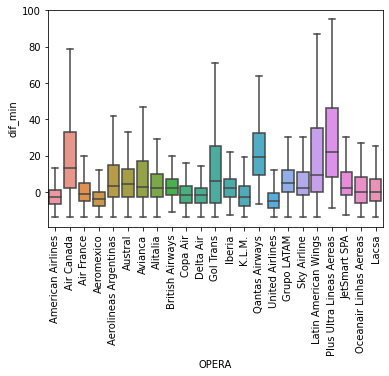

In [45]:
ax = sns.boxplot(x="OPERA", y="dif_min", data=scl_flt, showfliers = False)
ax.tick_params(axis='x', rotation=90)

In [46]:
scl_flt.pivot_table(values = "dif_min",columns="DIANOM",aggfunc=(np.mean))

DIANOM,Domingo,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes
dif_min,7.930788,9.52112,9.980653,8.324777,8.540835,8.315014,10.891469


In [47]:
scl_flt.pivot_table(values = "dif_min",index="periodo_dia",aggfunc=(np.mean))

,dif_min
periodo_dia,
manana,8.061534
noche,9.694086
tarde,9.757155


In [48]:
scl_flt.pivot_table(values = "dif_min",index="temporada_alta",columns="MES",aggfunc=(np.mean))

MES,1,2,3,4,5,6,7,8,9,10,11,12
temporada_alta,,,,,,,,,,,,
0,NaN,NaN,5.660711,5.773506,7.521756,8.542461,14.691698,8.616818,9.933929,11.295922,9.342763,10.363101
1,7.769646,7.537853,7.020566,NaN,NaN,NaN,16.011654,NaN,7.693356,NaN,NaN,13.088261


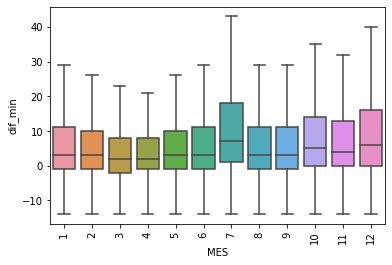

In [49]:
ax = sns.boxplot(x="MES", y="dif_min", data=scl_flt, showfliers = False)
ax.tick_params(axis='x', rotation=90)

In [50]:
scl_flt.pivot_table(values = "dif_min",index="OPERA",columns="periodo_dia",aggfunc=(np.mean)).style.applymap(highlight)

periodo_dia,manana,noche,tarde
OPERA,,,
Aerolineas Argentinas,6.290832,14.349040,12.428571
Aeromexico,nan,-2.756447,43.000000
Air Canada,21.879518,18.328571,28.904762
Air France,13.000000,nan,1.334270
Alitalia,3.837662,nan,7.428571
American Airlines,nan,0.277411,nan
Austral,nan,2.833333,9.181818
Avianca,9.031088,-0.415459,20.986339
British Airways,nan,nan,7.560976


In [51]:
scl_flt.pivot_table(values = "dif_min",index="OPERA",columns="temporada_alta",aggfunc=(np.mean)).style.applymap(highlight)

temporada_alta,0,1
OPERA,,
Aerolineas Argentinas,9.861351,10.362657
Aeromexico,-2.639344,-2.168224
Air Canada,16.466844,35.829787
Air France,0.366935,3.727273
Alitalia,4.342697,7.382716
American Airlines,-0.773092,2.297297
Austral,5.000000,10.173913
Avianca,11.398970,10.578667
British Airways,5.950355,11.109375


In [52]:
tbl1 = scl_flt.pivot_table(values = "dif_min",index="Des-I",aggfunc=(np.mean,"count")).sort_values(by="mean", ascending=False)

In [53]:
tbl1[tbl1["count"]>10]

,count,mean
Des-I,,
YSSY,195,26.835897
YMML,38,19.631579
SAAR,136,19.022059
NZAA,361,18.246537
CYYZ,283,15.766784
SAME,1625,15.512615
SANT,38,14.263158
SANU,35,14.142857
SBGL,1434,14.135983


In [54]:
scl_flt["chg_des"]=scl_flt.apply(lambda x: x["Des-I"]!=x["Des-O"],axis=1)*1

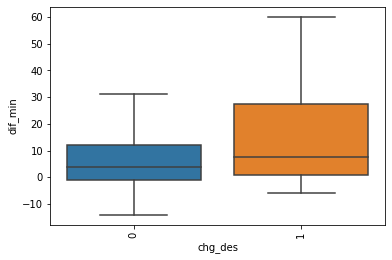

In [55]:
ax = sns.boxplot(x="chg_des", y="dif_min", data=scl_flt, showfliers = False)
ax.tick_params(axis='x', rotation=90)

In [56]:
scl_flt["log1"]=(scl_flt["dif_min"]<=15)*1

In [57]:
scl_flt["log2"]=((scl_flt["dif_min"]>15)&(scl_flt["dif_min"]<=45))*2

In [58]:
scl_flt["log3"]=(scl_flt["dif_min"]>45)*3

In [59]:
scl_flt["log_atra"] = scl_flt["log1"]+scl_flt["log2"]+scl_flt["log3"]

In [60]:
scl_flt.drop('log1', inplace=True, axis=1)
scl_flt.drop('log2', inplace=True, axis=1)
scl_flt.drop('log3', inplace=True, axis=1)

<AxesSubplot:xlabel='dif_min', ylabel='Probability'>

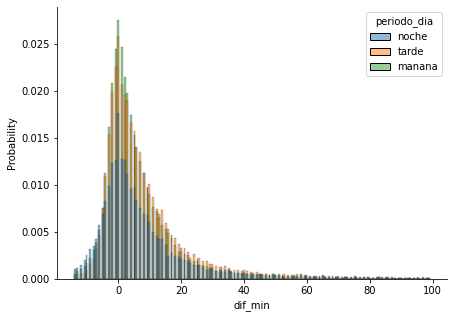

In [61]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(scl_flt[scl_flt["dif_min"]<100],x="dif_min" ,hue="periodo_dia", stat="probability")

Boxplots para relacionar data

In [62]:
from sklearn import datasets, linear_model

Dummy data con todo menos con el destino, utilizar arboles de decision para hacer una regression logistica 

In [63]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

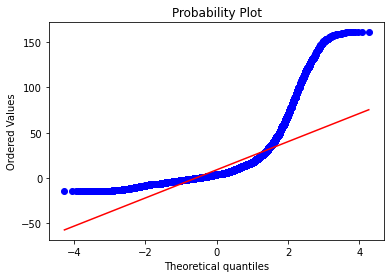

In [64]:
rvs = stats.norm(loc=0, scale=1)
normal_sample = rvs.rvs(size=1000)
stats.probplot(scl_flt["dif_min"], dist="norm", plot=plt)
plt.show()

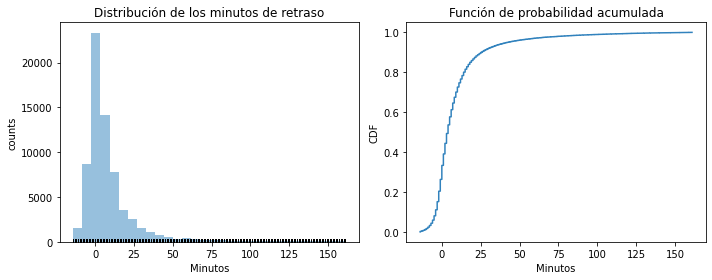

In [65]:
# Gráficos distribución observada (empírica)
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Histograma
axs[0].hist(x=scl_flt["dif_min"], bins=30, color="#3182bd", alpha=0.5)
axs[0].plot(scl_flt["dif_min"], np.full_like(scl_flt["dif_min"], -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución de los minutos de retraso')
axs[0].set_xlabel('Minutos')
axs[0].set_ylabel('counts')

# Función de Distribución Acumulada
# ecdf (empirical cumulative distribution function)
ecdf = ECDF(x=scl_flt["dif_min"])
axs[1].plot(ecdf.x, ecdf.y, color="#3182bd")
axs[1].set_title('Función de probabilidad acumulada')
axs[1].set_xlabel('Minutos')
axs[1].set_ylabel('CDF')

plt.tight_layout();

In [108]:
from scipy import stats
import tqdm
import inspect
import warnings
warnings.filterwarnings('ignore')

def seleccionar_distribuciones(familia='realall', verbose=True):

    distribuciones = [getattr(stats,d) for d in dir(stats) \
                     if isinstance(getattr(stats,d), (stats.rv_continuous, stats.rv_discrete))]
    
    exclusiones = ['levy_stable', 'vonmises']
    distribuciones = [dist for dist in distribuciones if dist.name not in exclusiones]
            
    dominios = {
        'realall' : [-np.inf, np.inf],
        'realline': [np.inf,np.inf],
        'realplus': [0, np.inf],
        'real0to1': [0, 1], 
        'discreta': [None, None],
    }

    distribucion = []
    tipo = []
    dominio_inf = []
    dominio_sup = []

    for dist in distribuciones:
        distribucion.append(dist.name)
        tipo.append(np.where(isinstance(dist, stats.rv_continuous), 'continua', 'discreta'))
        dominio_inf.append(dist.a)
        dominio_sup.append(dist.b)
    
    info_distribuciones = pd.DataFrame({
                            'distribucion': distribucion,
                            'tipo': tipo,
                            'dominio_inf': dominio_inf,
                            'dominio_sup': dominio_sup
                          })

    info_distribuciones = info_distribuciones \
                          .sort_values(by=['dominio_inf', 'dominio_sup'])\
                          .reset_index(drop=True)
    
    if familia in ['realall', 'realline', 'realplus', 'real0to1']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='continua']
        condicion = (info_distribuciones['dominio_inf'] == dominios[familia][0]) & \
                    (info_distribuciones['dominio_sup'] == dominios[familia][1]) 
        info_distribuciones = info_distribuciones[condicion].reset_index(drop=True)
        
    if familia in ['discreta']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='discreta']
        
    seleccion = [dist for dist in distribuciones \
                 if dist.name in info_distribuciones['distribucion'].values]
    
    
    if verbose:
        with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
            print(info_distribuciones)
    
    return seleccion


def comparar_distribuciones(x, familia='realall', ordenar='aic', verbose=True):
    
    distribuciones = seleccionar_distribuciones(familia=familia, verbose=verbose)
    distribucion_ = []
    log_likelihood_= []
    aic_ = []
    bic_ = []
    n_parametros_ = []
    parametros_ = []
    
    for i, distribucion in enumerate(distribuciones):
        
        #print(f"{i+1}/{len(distribuciones)} Ajustando distribución: {distribucion.name}")
        
        try:
            parametros = distribucion.fit(data=x)
            nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                                 if not p=='x'] + ["loc","scale"]
            parametros_dict = dict(zip(nombre_parametros, parametros))
            log_likelihood = distribucion.logpdf(x, *parametros).sum()
            aic = -2 * log_likelihood + 2 * len(parametros)
            bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)
            
            distribucion_.append(distribucion.name)
            log_likelihood_.append(log_likelihood)
            aic_.append(aic)
            bic_.append(bic)
            n_parametros_.append(len(parametros))
            parametros_.append(parametros_dict)
            
            resultados = pd.DataFrame({
                            'distribucion': distribucion_,
                            'log_likelihood': log_likelihood_,
                            'aic': aic_,
                            'bic': bic_,
                            'n_parametros': n_parametros_,
                            'parametros': parametros_,
                
                         })
            
            resultados = resultados.sort_values(by=ordenar).reset_index(drop=True)
            
        except Exception as e:
            print(f"Error al tratar de ajustar la distribución {distribucion.name}")
            print(e)
            print("")
            
    return resultados

In [107]:
def plot_distribucion(x, nombre_distribucion, ax=None):
    distribucion = getattr(stats, nombre_distribucion)

    parametros = distribucion.fit(data=x)

    nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                         if not p=='x'] + ["loc","scale"]
    parametros_dict = dict(zip(nombre_parametros, parametros))

    log_likelihood = distribucion.logpdf(x, *parametros).sum()

    aic = -2 * log_likelihood + 2 * len(parametros)
    bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

    x_hat = np.linspace(min(x), max(x), num=100)
    y_hat = distribucion.pdf(x_hat, *parametros)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))
        
    ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5);
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribución')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();

    print(f"Distribución:   {distribucion.name}")
    print(f"Dominio:        {[distribucion.a, distribucion.b]}")
    print(f"Parámetros:     {parametros_dict}")
    print(f"Log likelihood: {log_likelihood}")
    print(f"AIC:            {aic}")
    print(f"BIC:            {bic}")
    
    return ax


In [106]:
# Ajuste y comparación de distribuciones
# ==============================================================================
resultados = comparar_distribuciones(
                x=scl_flt["dif_min"].to_numpy(),
                familia='realall',
                ordenar='aic',
                verbose=False
            )

---------------------
Resultados del ajuste
---------------------
Distribución:   dgamma
Dominio:        [-inf, inf]
Parámetros:     {'a': 0.7369871932190541, 'loc': 2.999999999999999, 'scale': 13.594652488135754}
Log likelihood: -245144.3793018503
AIC:            490294.7586037006
BIC:            490322.1494671501


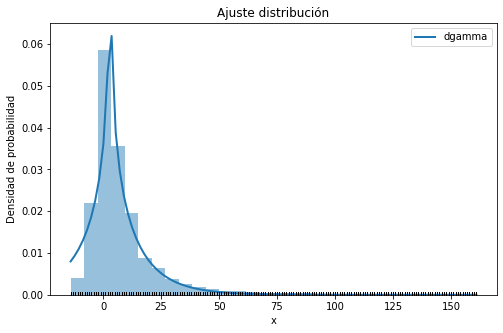

In [70]:
fig, ax = plt.subplots(figsize=(8,5))
# Ajuste y comparación de distribuciones
# ==============================================================================

plot_distribucion(
    x=scl_flt["dif_min"].to_numpy(),
    nombre_distribucion=resultados['distribucion'][0],
    ax=ax
);

Escoger las variables que vamos a utilizar, OPERA, TIPOVUELO, temporada_alta, periodo_dia, MES

In [71]:
X1 = scl_flt[['OPERA','TIPOVUELO','temporada_alta','periodo_dia','MES']]
Y1 = scl_flt['dif_min']

In [72]:
X = pd.get_dummies(data=X1, drop_first=True)

In [73]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size = .20, random_state = 40)

regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

In [74]:
error = Y_test-predicted

In [75]:
mean_squared_error(Y_test, predicted)

348.5556767635866

In [76]:
error.describe()

count    13642.000000
mean        -0.044268
std         18.670278
min        -42.370106
25%         -9.230976
50%         -4.681033
75%          2.635166
max        160.905214
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

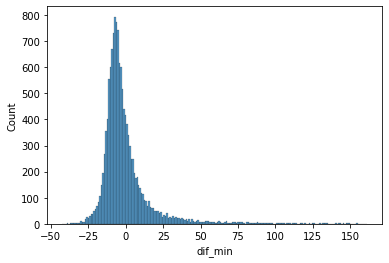

In [77]:
sns.histplot(error)

In [112]:
X2 = scl_flt[['OPERA','TIPOVUELO','temporada_alta','periodo_dia','MES',"chg_des"]]
X = pd.get_dummies(data=X2, drop_first=True)
Y = scl_flt['dif_min']

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

In [114]:
predicted = pd.DataFrame(predicted)

In [115]:
predicted.describe()

,0
count,13642.000000
mean,9.141883
std,4.711508
min,-5.185975
25%,6.597948
50%,8.866253
75%,11.354721
max,38.701149


In [116]:
predicted.quantile(.9)


0    13.814197
Name: 0.9, dtype: float64

In [122]:
100-stats.percentileofscore(predicted, 13.814197)

9.771294531593611

<AxesSubplot:ylabel='Count'>

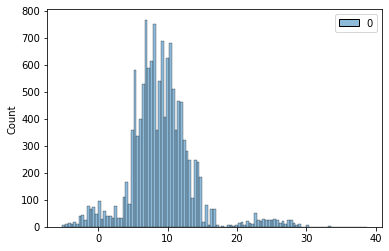

In [85]:
sns.histplot(predicted)

In [87]:
from scipy.stats import shapiro
from scipy.stats import normaltest
stat, p = normaltest(predicted)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2662.563, p=0.000
Sample does not look Gaussian (reject H0)


In [88]:
error = Y_test-predicted

In [89]:
mean_squared_error(Y_test, predicted)

348.8197857953083

In [91]:
gammadf = scl_flt[scl_flt["dif_min"]>0]

X3 = gammadf[['OPERA','TIPOVUELO','temporada_alta','periodo_dia','MES',"chg_des"]]
X = pd.get_dummies(data=X3, drop_first=True)
Y3 = gammadf['dif_min']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y3, test_size = .20, random_state = 40)


In [92]:
clf = linear_model.GammaRegressor()
clf.fit(X, Y3)
predicted = clf.predict(X_test)

In [93]:
mean_squared_error(Y_test, predicted)

440.1094659219771

In [94]:
error = Y_test-predicted

In [95]:
error.astype(int).describe()

count    9102.000000
mean        0.328060
std        20.680656
min       -17.000000
25%       -11.000000
50%        -6.000000
75%         1.000000
max       146.000000
Name: dif_min, dtype: float64

<AxesSubplot:xlabel='dif_min', ylabel='Count'>

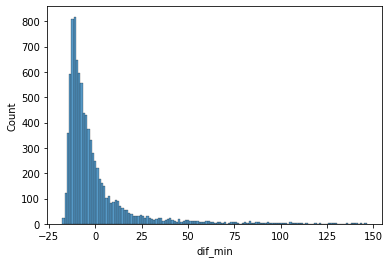

In [96]:
sns.histplot(error)

Regression logistica con 1 y 0 o con 3 variables de 0 a 15 de 15 a 45 y 45 en adelante

Incluyendo el destino no cambia la prediccion, hacer un test

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
X1 = scl_flt[['TIPOVUELO','temporada_alta']]
X1 = pd.get_dummies(data=X1, drop_first=True)
Y1 = scl_flt['atraso_15']
clf1 = tree.DecisionTreeClassifier(max_leaf_nodes=5,random_state=0)
clf1.fit(X1, Y1)
cross_val_score(clf, X1, Y1, cv=3)

array([nan, nan, nan])

In [98]:
X2 = scl_flt[['TIPOVUELO','temporada_alta','OPERA']]
X2 = pd.get_dummies(data=X2, drop_first=True)
Y2 = scl_flt['atraso_15']
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5,random_state=0)
clf.fit(X2, Y2)
cross_val_score(clf, X2, Y2, cv=3)

array([0.815095  , 0.80791731, 0.81504289])

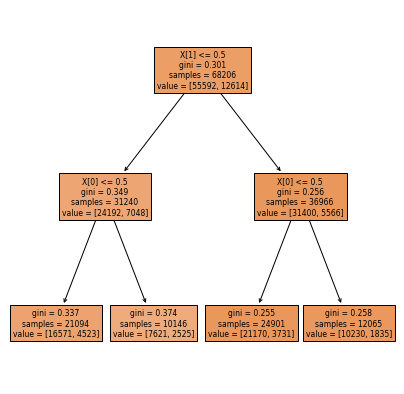

In [99]:
_, ax = plt.subplots(figsize=(7,7)) # Resize figure
tree.plot_tree(clf1, filled=True, ax=ax)
plt.show()


LOS CLASIFICADORES PUEDEN DARME LA PROBABILIDAD

In [100]:
from sklearn.neighbors import KNeighborsClassifier
XK = scl_flt[['TIPOVUELO','temporada_alta']]
XK = pd.get_dummies(data=XK, drop_first=True)
YK = scl_flt['atraso_15']
X_train, X_test, Y_train, Y_test = train_test_split(XK, YK, test_size = .20, random_state = 40)

clf = KNeighborsClassifier(n_neighbors=2) 
clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)

In [101]:
clf.score(X_test,Y_test)

0.8114645946342178

In [104]:
XK = scl_flt[['TIPOVUELO','temporada_alta']]
XK = pd.get_dummies(data=XK, drop_first=True)
YK = scl_flt['log_atra']
X_train, X_test, Y_train, Y_test = train_test_split(XK, YK, test_size = .20, random_state = 40)
clf = KNeighborsClassifier(n_neighbors=3) 
clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)

In [105]:
clf.score(X_test,Y_test)

0.8114645946342178

Comentar enviroment

## Test

In [137]:
scl_flt.to_csv("data_streamlit.csv",index=False)